In [135]:
import numpy as np
import matplotlib.pyplot as plt

In [136]:
'''
S - Keep prices same
R - Reduce prices

grudger_player or Grim Trigger - player will keep prices same as long as the other player never reduces prices
tit_for_tat - player will start by keeping prices same and then will copy the other player's strategy for the rest of the game
random_player - player will randomly choose between S and R
always reduce - player will always reduce prices
'''
# function that defines the tit for tat player's strategy
def tit_for_tat(other_player_move_history):
    if other_player_move_history == []:
        return 'S'
    elif len(other_player_move_history) > 0:
        return other_player_move_history[-1]

# function that defines the random player's strategy
def random_player():
    return np.random.choice(['R', 'S'])

# function that defines the grudy player's strategy or the grim trigger strategy 
def grudger_player(other_player_last_move_history, number_of_moves):
    if number_of_moves == 0:
        return 'S'
    elif 'R' in other_player_last_move_history:
        return 'R'
    elif 'R' not in other_player_last_move_history and other_player_last_move_history[-1] == 'S':
        return 'S'

def always_reduce():
    return 'S'

# calculate payoffs for the game payoffs are besed on the values in the paper. 
def calculate_payoffs(player1_choice, player2_choice):
    if player1_choice == 'S' and player2_choice == 'S':
        return 5.71, 5.71
    elif player1_choice == 'S' and player2_choice == 'R':
        return 2.056, 8.222
    elif player1_choice == 'R' and player2_choice == 'S':
        return 8.222, 2.056
    elif player1_choice == 'R' and player2_choice == 'R':
        return 4.835, 4.835

In [137]:
def run_game_n_times(number_of_games, player1_opening_strategy, player2_opening_strategy):
    CU_payoff, GS25_payoff  = 0,0
    CU_cumulative_payoff, GS25_cumulative_payoff = 0,0
    CU_history, GS25_history = [player1_opening_strategy], [player2_opening_strategy]
    for i in range(number_of_games):
        # calculate the payoffs for the game the previous game
        CU_prev_decision = CU_history[-1]
        GS25_prev_decision = GS25_history[-1]
        CU_payoff, GS25_payoff = calculate_payoffs(CU_prev_decision, GS25_prev_decision)
        CU_cumulative_payoff += CU_payoff
        GS25_cumulative_payoff += GS25_payoff

        # get the next decisions for the game
        CU_decision = tit_for_tat(GS25_history)
        GS25_decision = tit_for_tat(CU_history)
        CU_history.append(CU_decision)
        GS25_history.append(GS25_decision)
    return CU_cumulative_payoff, GS25_cumulative_payoff

In [138]:
# When the players open the game by both cooperating, and they are playing a tit for tat strategy. 
CU_opening_strategy, GS25_opening_strategy = 'S', 'S'
number_of_games = 10
CU_payoffs, GS25_payoffs = run_game_n_times(number_of_games, CU_opening_strategy, GS25_opening_strategy)
print('When both players open the game by both cooperating, and they are playing a tit for tat strategy, the payoffs are:')
print(f'CU_payoffs: {CU_payoffs}', f'GS25_payoffs: {GS25_payoffs}')

When both players open the game by both cooperating, and they are playing a tit for tat strategy, the payoffs are:
CU_payoffs: 57.1 GS25_payoffs: 57.1


In [139]:
# When one player starts by cooperating and the other starts by defecting and they are playing a tit for tat strategy.
CU_opening_strategy, GS25_opening_strategy = 'S', 'R'
number_of_games = 10
CU_payoffs, GS25_payoffs = run_game_n_times(number_of_games, CU_opening_strategy, GS25_opening_strategy)
print('When one company starts by reducing prices and the other starts by prices same and they are playing a tit for tat strategy, the payoffs are:')
print(f'CU_payoffs: {CU_payoffs}', f'GS25_payoffs: {GS25_payoffs}')

When one company starts by reducing prices and the other starts by prices same and they are playing a tit for tat strategy, the payoffs are:
CU_payoffs: 51.38999999999999 GS25_payoffs: 51.38999999999999


In [140]:
# when both players start by reducing prices and they are playing a tit for tat strategy.
CU_opening_strategy, GS25_opening_strategy = 'R', 'R'
number_of_games = 10
CU_payoffs, GS25_payoffs = run_game_n_times(number_of_games, CU_opening_strategy, GS25_opening_strategy)
print('When both players start by reducing prices and they are playing a tit for tat strategy, the payoffs are:')
print(f'CU_payoffs: {CU_payoffs}', f'GS25_payoffs: {GS25_payoffs}')

When both players start by reducing prices and they are playing a tit for tat strategy, the payoffs are:
CU_payoffs: 48.35 GS25_payoffs: 48.35


In [141]:
'''
Let's test how other strategies would fare against the tit for tat strategy that opens with keeping prices same always.

GS25 is playing a random player strategy and CU is playing a tit-for-tat player strategy.
'''

def test_against_tit_for_tat(number_of_games):
    CU_payoff, GS25_payoff  = 0,0
    CU_cumulative_payoff, GS25_cumulative_payoff = 0,0 # cumulative payoffs for each player after n games
    
    CU_history, GS25_history = ['S'], [np.random.choice(['R', 'S'])]
    for i in range(number_of_games):
        # calculate the payoffs for the game the previous game
        CU_prev_decision = CU_history[-1]
        GS25_prev_decision = GS25_history[-1]
        CU_payoff, GS25_payoff = calculate_payoffs(CU_prev_decision, GS25_prev_decision)
        CU_cumulative_payoff += CU_payoff
        GS25_cumulative_payoff += GS25_payoff

        # get the next decisions for the game
        CU_decision = tit_for_tat(GS25_history)
        GS25_decision = random_player()
        CU_history.append(CU_decision)
        GS25_history.append(GS25_decision)

    return CU_cumulative_payoff, GS25_cumulative_payoff


In [142]:
print('when GS25 is playing a random player strategy and CU is playing a tit-for-tat player strategy, the payoffs are:')
CU_payoffs, GS25_payoffs = test_against_tit_for_tat(number_of_games)
print(f'CU_payoffs: {CU_payoffs}', f'GS25_payoffs: {GS25_payoffs}')
print('What you notice is that since the GS25 is playing randomly, it is more difficult to win the game for CU but CU still performs better sometimes than GS25. As such, the tit-for-tat strategy helps sometimes but not always but it offsets the losses.')

when GS25 is playing a random player strategy and CU is playing a tit-for-tat player strategy, the payoffs are:
CU_payoffs: 48.537 GS25_payoffs: 54.703
What you notice is that since the GS25 is playing randomly, it is more difficult to win the game for CU but CU still performs better sometimes than GS25. As such, the tit-for-tat strategy helps sometimes but not always but it offsets the losses.


In [143]:
# test tit for tat against grudger player strategy that opens with keeping prices same always.


def test_against_grudger(number_of_games):
    CU_payoff, GS25_payoff  = 0,0
    CU_cumulative_payoff, GS25_cumulative_payoff = 0,0 # cumulative payoffs for each player after n games

    CU_history, GS25_history = ['S'], ['S']
    for game in range(number_of_games):
        # calculate the payoffs for the game the previous game
        CU_prev_decision = CU_history[-1]
        GS25_prev_decision = GS25_history[-1]
        CU_payoff, GS25_payoff = calculate_payoffs(CU_prev_decision, GS25_prev_decision)
        CU_cumulative_payoff += CU_payoff
        GS25_cumulative_payoff += GS25_payoff

        # get the next decisions for the game
        CU_decision = grudger_player(GS25_history, game)
        GS25_decision = tit_for_tat(CU_history)
        CU_history.append(CU_decision)
        GS25_history.append(GS25_decision)

    return CU_cumulative_payoff, GS25_cumulative_payoff

print('when GS25 is playing a grudger player strategy and CU is playing a tit-for-tat player strategy, the payoffs are:')
CU_payoffs, GS25_payoffs = test_against_grudger(number_of_games)
print(f'CU_payoffs: {CU_payoffs}', f'GS25_payoffs: {GS25_payoffs}')

when GS25 is playing a grudger player strategy and CU is playing a tit-for-tat player strategy, the payoffs are:
CU_payoffs: 57.1 GS25_payoffs: 57.1


In [144]:
# test tit for tat against always reduce strategy
def test_against_always_reduce(number_of_games):
    CU_payoff, GS25_payoff  = 0,0
    CU_cumulative_payoff, GS25_cumulative_payoff = 0,0 # cumulative payoffs for each player after n games

    CU_history, GS25_history = ['R'], ['S']
    for game in range(number_of_games):
        # calculate the payoffs for the game the previous game
        CU_prev_decision = CU_history[-1]
        GS25_prev_decision = GS25_history[-1]
        CU_payoff, GS25_payoff = calculate_payoffs(CU_prev_decision, GS25_prev_decision)
        CU_cumulative_payoff += CU_payoff
        GS25_cumulative_payoff += GS25_payoff

        # get the next decisions for the game
        CU_decision = always_reduce()
        GS25_decision = tit_for_tat(CU_history)
        CU_history.append(CU_decision)
        GS25_history.append(GS25_decision)
        
    return CU_cumulative_payoff, GS25_cumulative_payoff


print('when GS25 is playing a always reduce strategy and CU is playing a tit-for-tat player strategy, the payoffs are:')
CU_payoffs, GS25_payoffs = test_against_always_reduce(number_of_games)
print(f'CU_payoffs: {CU_payoffs}', f'GS25_payoffs: {GS25_payoffs}')
print('What you notice is that the tit-for-tat strategy balances the payoffs between the two players. when the other player plays reduce')


when GS25 is playing a always reduce strategy and CU is playing a tit-for-tat player strategy, the payoffs are:
CU_payoffs: 55.958000000000006 GS25_payoffs: 55.958000000000006
What you notice is that the tit-for-tat strategy balances the payoffs between the two players. when the other player plays reduce


In [145]:
# evolution of cooperation with the tit for tat strategies if both players play tit for tat

def evolution_of_cooperation(player1_opening_strategy, player2_opening_strategy, number_of_games):
    CU_payoff, GS25_payoff  = 0,0
    CU_cumulative_payoff, GS25_cumulative_payoff = 0,0 # cumulative payoffs for each player after n games
    
    CU_history, GS25_history = [player1_opening_strategy], [player2_opening_strategy]

    evolution_of_CU_payoff, evolution_of_GS25_payoff = [], []
    for game in range(number_of_games):
        # calculate the payoffs for the game the previous game
        CU_prev_decision = CU_history[-1]
        GS25_prev_decision = GS25_history[-1]
        CU_payoff, GS25_payoff = calculate_payoffs(CU_prev_decision, GS25_prev_decision)
        CU_cumulative_payoff += CU_payoff
        GS25_cumulative_payoff += GS25_payoff

        # get the next decisions for the game
        CU_decision = tit_for_tat(GS25_history)
        GS25_decision = tit_for_tat(CU_history)
        CU_history.append(CU_decision)
        GS25_history.append(GS25_decision)

        #store the cumulative payoffs for each player
        evolution_of_CU_payoff.append(CU_cumulative_payoff)
        evolution_of_GS25_payoff.append(GS25_cumulative_payoff)
    return evolution_of_CU_payoff, evolution_of_GS25_payoff

def visualize_evolution_of_cooperation(CU_payoffs, GS25_payoffs, title):
    plt.figure(figsize=(12,8))
    plt.plot(CU_payoffs, label='CU')
    plt.plot(GS25_payoffs, label='GS25')
    plt.xlabel('number of Games')
    plt.ylabel('cumulative payoff')
    plt.title(title)
    plt.legend()
    plt.show()

when GS25 is playing a tit-for-tat player strategy and CU is playing a tit-for-tat player strategy and both start with keeping prices same
final payoff for CU: 57.1 and GS25: 57.1


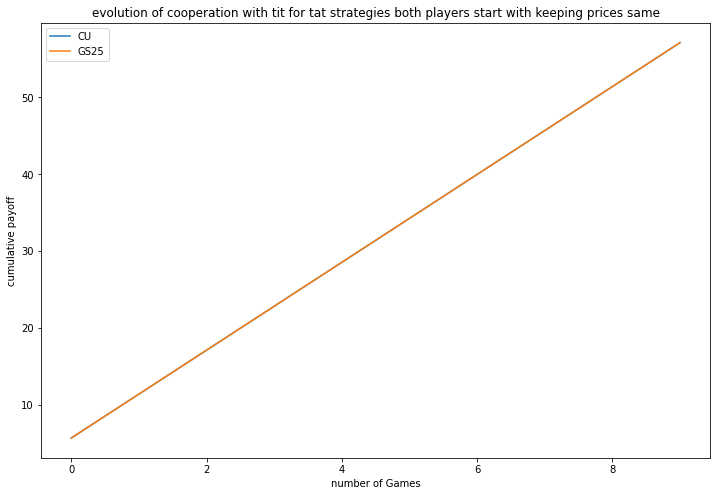

In [146]:
print('when GS25 is playing a tit-for-tat player strategy and CU is playing a tit-for-tat player strategy and both start with keeping prices same')
CU_payoffs, GS25_payoffs = evolution_of_cooperation('S', 'S', number_of_games)
print('final payoff for CU: {} and GS25: {}'.format(CU_payoffs[-1], GS25_payoffs[-1]))
visualize_evolution_of_cooperation(CU_payoffs, GS25_payoffs,'evolution of cooperation with tit for tat strategies both players start with keeping prices same')

when GS25 is playing a tit-for-tat player strategy and CU is playing a tit-for-tat player strategy and cu starts with keeping prices same and gs25 starts with reducing prices
final payoff for CU: 51.38999999999999 and GS25: 51.38999999999999


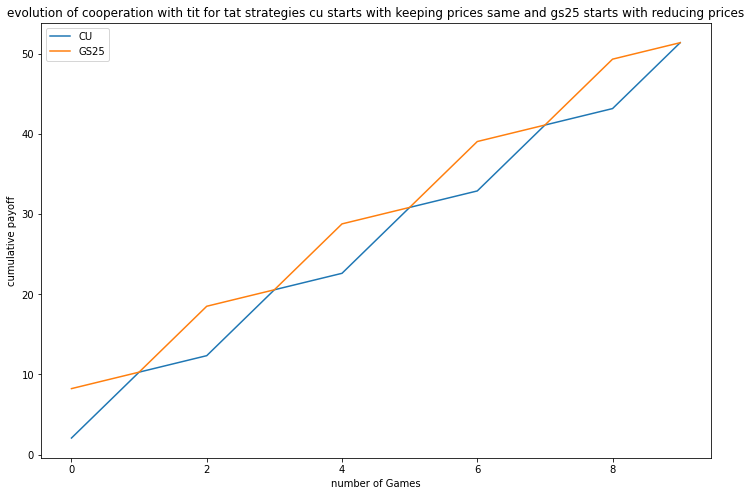

In [147]:
print('when GS25 is playing a tit-for-tat player strategy and CU is playing a tit-for-tat player strategy and cu starts with keeping prices same and gs25 starts with reducing prices')
CU_payoffs, GS25_payoffs = evolution_of_cooperation('S', 'R', number_of_games)
print('final payoff for CU: {} and GS25: {}'.format(CU_payoffs[-1], GS25_payoffs[-1])) 
visualize_evolution_of_cooperation(CU_payoffs, GS25_payoffs,'evolution of cooperation with tit for tat strategies cu starts with keeping prices same and gs25 starts with reducing prices')


when GS25 is playing a tit-for-tat player strategy and CU is playing a tit-for-tat player strategy and cu starts with reducing prices and gs25 starts with keeping prices same
final payoff for cu:51.38999999999999 and gs25:51.38999999999999


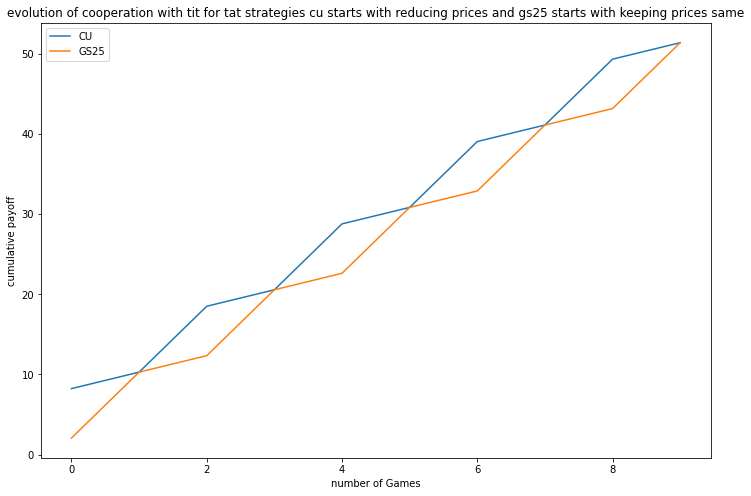

In [148]:
print('when GS25 is playing a tit-for-tat player strategy and CU is playing a tit-for-tat player strategy and cu starts with reducing prices and gs25 starts with keeping prices same')
print('final payoff for cu:{} and gs25:{}'.format(CU_payoffs[-1], GS25_payoffs[-1]))
CU_payoffs, GS25_payoffs = evolution_of_cooperation('R', 'S', number_of_games)
visualize_evolution_of_cooperation(CU_payoffs, GS25_payoffs,'evolution of cooperation with tit for tat strategies cu starts with reducing prices and gs25 starts with keeping prices same')


when GS25 is playing a tit-for-tat player strategy and CU is playing a tit-for-tat player strategy and both start with reducing prices
final payoff for CU: 48.35 and GS25: 48.35


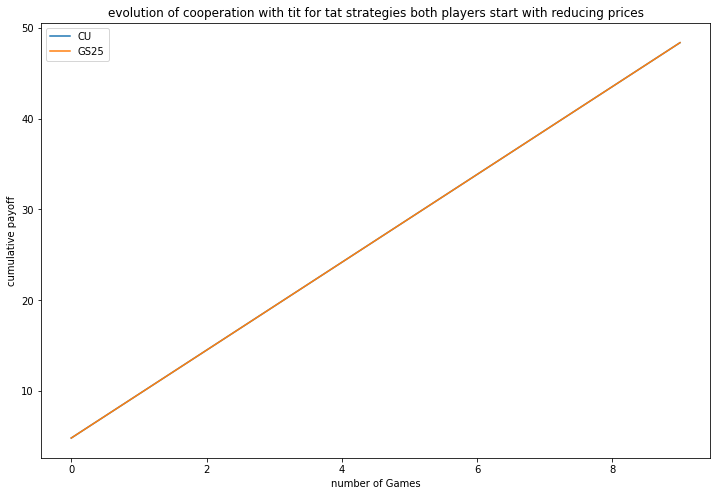

In [149]:
print('when GS25 is playing a tit-for-tat player strategy and CU is playing a tit-for-tat player strategy and both start with reducing prices')
CU_payoffs, GS25_payoffs = evolution_of_cooperation('R', 'R', number_of_games)
print('final payoff for CU: {} and GS25: {}'.format(CU_payoffs[-1], GS25_payoffs[-1]))
visualize_evolution_of_cooperation(CU_payoffs, GS25_payoffs,'evolution of cooperation with tit for tat strategies both players start with reducing prices')
